# Linear Regression Practical

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_csv('BostonHousing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
df=pd.DataFrame(data)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [14]:
#df.columns=data.feature_names

In [20]:
#independnt features and dependent features
x=df
y=df.medv

In [22]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [24]:
#train_test_split
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [30]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04,21.2
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21,19.3
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


In [32]:
from sklearn.linear_model import LinearRegression

In [36]:
## Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [40]:
x_train=scaler.fit_transform(x_train)

In [64]:
x_test=scaler.fit_transform(x_test)

In [94]:
x_inverse=scaler.inverse_transform(x_train)

In [48]:
#cross validation
from sklearn.model_selection import cross_val_score

In [76]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [78]:
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=5) 
#scoring - is to measure the accuracy
#we will get 5 trained values of cross validation

In [80]:
np.mean(mse)

-2.5592218820749885e-27

In [82]:
#prediction
reg_predict=regression.predict(x_test)

In [84]:
reg_predict

array([25.39666335, 34.95433778, 14.53566968, 24.52778385, 17.25091809,
       21.48670563, 19.09728702, 14.97010942, 21.05226588, 18.01118765,
       23.11585468, 20.29199632,  7.36741385, 22.79002487, 19.85755658,
       32.13047942, 20.18338639, 10.84293183, 54.06968664, 15.07871936,
       27.13442234, 31.37020987, 13.55818025, 24.09334411, 15.1873293 ,
       14.75288955, 21.81253544, 15.94759885, 23.33307455, 19.6403367 ,
       24.85361366, 25.61388322, 16.05620879, 22.35558512, 20.5092162 ,
       20.83504601, 37.45236632, 20.94365594, 26.26554284, 25.17944347,
       21.16087582, 30.39272044, 54.06968664, 18.66284727, 24.31056398,
       16.16481873, 13.99261999, 26.04832297, 21.37809569, 25.83110309,
       20.29199632, 38.21263588, 16.27342866, 28.54635151, 47.01004075,
       22.79002487, 19.74894664, 30.71855025, 25.72249316, 19.85755658,
       26.91720246, 38.21263588, 33.97684835, 21.7039255 , 25.93971303,
       21.48670563, 13.99261999, 26.69998259, 33.21657879, 13.55

C:\Users\rohit\AppData\Local\Temp\ipykernel_3096\1746054160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reg_predict-y_test,kde=True)


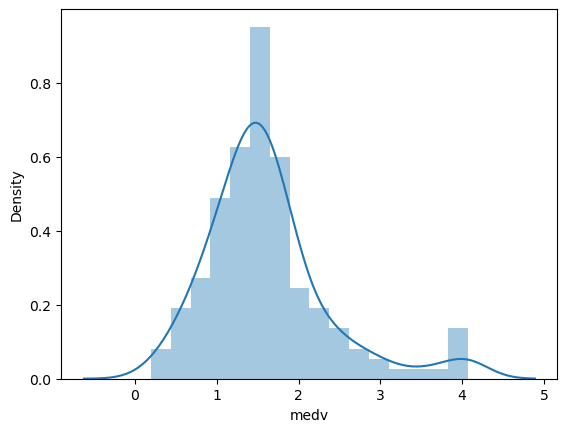

In [92]:
sns.distplot(reg_predict-y_test,kde=True)
plt.show()

In [100]:
from sklearn.metrics import r2_score

In [102]:
score=r2_score(reg_predict,y_test)

In [104]:
score

0.9643012729413781